## Setup

In [1]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Display Settings 
display = pd.options.display
display.max_columns = 100
display.max_rows = 100
display.max_colwidth = 199
display.width = 1000

In [2]:
# Working Directory & Data files

wdir = os.getcwd()
data_file_name = '\Loan_status_2007-2020Q3.gzip'
meta_file_name = '\LCDataDictionary.xlsx'

## Read Data

In [3]:
# Read Loan level data

loan_data = pd.read_csv(wdir+data_file_name, low_memory=False, index_col=False)
print(loan_data.shape) #(2925493, 142)

(2925493, 142)


In [4]:
# Rearrange columns alphabetically; column name formatting is okay

col_names = list(loan_data.columns)
col_names.sort()
loan_data = loan_data[col_names]
print(col_names)

['Unnamed: 0', 'acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'deferral_term', 'delinq_2yrs', 'delinq_amnt', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',

In [5]:
# Read Meta-data with columns descriptions
meta_data = pd.read_excel(wdir+meta_file_name)
meta_data.columns = ['Field','Description']
print('Original dataset: ', meta_data.shape) #(153, 2)

# Fields not available in loan data were removed from Meta-data
meta_data['Field'] = meta_data['Field'].str.strip()
meta_data_deleted = meta_data[~meta_data['Field'].isin(col_names)]
print('Fields not available in data: ')
meta_data_deleted.style.set_properties(subset=['Description'], **{'text-align':'left'})
     

Original dataset:  (153, 2)
Fields not available in data: 


,Field,Description
15,desc,Loan description provided by the borrower
44,member_id,A unique LC assigned Id for the borrower member.
113,verified_status_joint,"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"
127,sec_app_mths_since_last_major_derog,Months since most recent 90-day or worse rating at time of application for the secondary applicant
143,disbursement_method,"The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY"
145,debt_settlement_flag_date,The most recent date that the Debt_Settlement_Flag has been set
146,settlement_status,"The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT"
147,settlement_date,The date that the borrower agrees to the settlement plan
148,settlement_amount,The loan amount that the borrower has agreed to settle for
149,settlement_percentage,The settlement amount as a percentage of the payoff balance amount on the loan


In [6]:
# Fields available in loan data
meta_data = meta_data[meta_data['Field'].isin(col_names)]
meta_data.sort_values(by='Field', inplace=True)
meta_data.reset_index(drop=True, inplace=True)
print('Keeping only columns available in loan data: ', meta_data.shape) #(140, 2)

meta_data.style.set_properties(subset=['Description'], **{'text-align':'left'})

Keeping only columns available in loan data:  (140, 2)


,Field,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [7]:
# Review loan data
loan_data.head()

,Unnamed: 0,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,deferral_term,delinq_2yrs,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,...,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,payment_plan_start_date,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0,0.0,NaN,AZ,NaN,24000.0,NaN,Individual,NaN,NaN,NaN,0.0,0.00,0.0,N,NaN,0.0,0.0,27.65,NaN,Jan-1985,10+ years,NaN,739.0,735.0,5000.0,4975.0,B,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,1077501,NaN,f,NaN,NaN,1.0,162.87,10.65%,Dec-2011,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,credit_card,n,0.0,13648.0,NaN,83.7%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2,0.0,36 months,Computer,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,5863.155187,5833.84,863.16,0.00,5000.00,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Verified,NaN,860xx
1,1,0.0,NaN,GA,NaN,30000.0,NaN,Individual,NaN,NaN,NaN,0.0,1.11,0.0,N,NaN,0.0,0.0,1.00,NaN,Apr-1999,< 1 year,Ryder,744.0,740.0,2500.0,2500.0,C,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,1077430,NaN,f,NaN,NaN,5.0,59.83,15.27%,Dec-2011,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,car,n,122.9,1687.0,NaN,9.4%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C4,0.0,60 months,bike,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1014.530000,1014.53,435.17,0.00,456.46,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Source Verified,NaN,309xx
2,2,0.0,NaN,IL,NaN,12252.0,NaN,Individual,NaN,NaN,NaN,0.0,0.00,0.0,N,NaN,0.0,0.0,8.72,NaN,Nov-2001,10+ years,NaN,739.0,735.0,2400.0,2400.0,C,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,1077175,NaN,f,NaN,NaN,2.0,84.33,15.96%,Dec-2011,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,small_business,n,0.0,2956.0,NaN,98.5%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C5,0.0,36 months,real estate business,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,3005.666844,3005.67,605.67,0.00,2400.00,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,Not Verified,NaN,606xx
3,3,0.0,NaN,CA,NaN,49200.0,NaN,Individual,NaN,NaN,NaN,0.0,0.00,0.0,N,NaN,0.0,0.0,20.00,NaN,Feb-1996,10+ years,AIR RESOURCES BOARD,694.0,690.0,10000.0,10000.0,C,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,1076863,NaN,f,NaN,NaN,1.0,339.31,13.49%,Dec-2011,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,other,n,0.0,5598.0,NaN,21%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C1,0.0,36 months,personel,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,12231.890000,12231.89,2214.92,16.97,10000.00,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,Source Verified,NaN,917xx
4,4,0.0,NaN,OR,NaN,80000.0,NaN,Individual,NaN,NaN,NaN,0.0,0.00,0.0,N,NaN,0.0,0.0,17.94,NaN,Jan-1996,1 year,University Medical Group,699.0,695.0,3000.0,3000.0,B,NaN,NaN,NaN,N,NaN,NaN,NaN

### Identify (and remove) columns that are:
1. not relevant (based on inspection of their description)
2. not available at the time of application

In [8]:
# Fields not relevant

field_not_relevant = ['Unnamed: 0', 'emp_title', 'id', 'policy_code', 'title', 'url', 'zip_code']
    # 'sub_grade', 'grade', addr_state', int_rate', 'initial_list_status'
    # 'sub-grade' was dropped in favor of 'grade' due to equivalent WOE, but lower count of dummy required
    
print('Reviewing description of removed fields:')
meta_data[meta_data['Field'].isin(field_not_relevant)].style.set_properties(subset=['Description'], **{'text-align':'left'})

Reviewing description of removed fields:


,Field,Description
21,emp_title,The job title supplied by the Borrower when applying for the loan.*
40,id,A unique LC assigned ID for the loan listing.
98,policy_code,publicly available policy_code=1 new products not publicly available policy_code=2
121,title,The loan title provided by the borrower
137,url,URL for the LC page with listing data.
139,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.


In [9]:
# loan_data.groupby(['grade','sub_grade'])[['grade','sub_grade']].nunique()
# pd.unique(loan_data['addr_state'])

In [10]:
# Fields not available at the time of decision
# https://www.kaggle.com/tysonpo/columns-available-at-origination-answer

field_not_available = ['acc_now_delinq', 'collection_recovery_fee', 'debt_settlement_flag', 'deferral_term', 'hardship_amount',
                       'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length',
                       'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date',
                       'hardship_status', 'hardship_type', 'installment', 'last_credit_pull_d', 'last_fico_range_high',
                       'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d',
                       'orig_projected_additional_accrued_interest', 'out_prncp', 'out_prncp_inv', 'payment_plan_start_date',
                       'pymnt_plan', 'recoveries', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
                       'total_rec_prncp']

print('Reviewing description of removed fields:')
meta_data[meta_data['Field'].isin(field_not_available)].style.set_properties(subset=['Description'], **{'text-align':'left'})

Reviewing description of removed fields:


,Field,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
11,collection_recovery_fee,post charge off collection fee
13,debt_settlement_flag,"Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company."
14,deferral_term,Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan
27,hardship_amount,The interest payment that the borrower has committed to make each month while they are on a hardship plan
28,hardship_dpd,Account days past due as of the hardship plan start date
29,hardship_end_date,The end date of the hardship plan period
30,hardship_flag,Flags whether or not the borrower is on a hardship plan
31,hardship_last_payment_amount,The last payment amount as of the hardship plan start date
32,hardship_length,The number of months the borrower will make smaller payments than normally obligated due to a hardship plan


### Cleaning Dataset:
* removing fields identified above 
* formatting fields
* reviewing missing values

In [11]:
# Removing fields identified above
loan_data_clean = loan_data.drop(columns = field_not_available + field_not_relevant)
print(len(loan_data.columns), len(field_not_available), len(field_not_relevant))
print(loan_data_clean.shape) #(2925493, 101)

142 34 7
(2925493, 101)


In [12]:
# Review Formatting & Data types
loan_data_clean[~loan_data_clean.isna().any(axis=1)].sample(5)

,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,sub_grade,tax_liens,term,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,verification_status_joint
741311,1.0,NV,51.0,35000.0,70000.0,Joint App,4857.0,9471.0,8.0,0.0,0.0,0.0,0.0,39.97,25.02,Jan-2006,2 years,674.0,670.0,8000.0,7975.0,C,RENT,59.0,f,0.0,1.0,0.0,14.47%,Sep-2018,8000.0,Charged Off,829.0,122.0,97.0,4.0,4.0,1.0,71.0,71.0,112.0,38.0,30.0,71.0,12.0,71.0,3.0,1.0,2.0,4.0,...,8.0,6.0,10.0,2.0,8.0,0.0,0.0,0.0,1.0,8.0,1.0,2.0,0.0,0.0,1.0,1.0,78.9,25.0,1.0,1.0,moving,2164.0,13791.0,15.6%,0.0,0.0,Jul-2008,679.0,675.0,0.0,0.0,17.0,13.0,2.0,43.1,C2,0.0,36 months,511.0,38854.0,75937.0,19.0,38854.0,36690.0,10300.0,0.0,62037.0,13900.0,Verified,Verified
1401789,6.0,MS,52.0,55000.0,180000.0,Joint App,12842.0,6024.0,63.7,0.0,0.0,3.0,0.0,44.53,16.98,Dec-2005,4 years,669.0,665.0,32000.0,32000.0,B,MORTGAGE,54.0,w,0.0,1.0,0.0,12.40%,Nov-2019,32000.0,Current,2594.0,128.0,167.0,5.0,5.0,2.0,11.0,60.0,114.0,26.0,32.0,45.0,8.0,11.0,0.0,5.0,14.0,8.0,...,8.0,24.0,33.0,14.0,27.0,0.0,0.0,0.0,2.0,27.0,1.0,2.0,0.0,0.0,1.0,5.0,85.7,57.1,1.0,1.0,debt_consolidation,19682.0,25838.0,49.3%,0.0,0.0,May-2009,634.0,630.0,1.0,1.0,8.0,8.0,1.0,8.1,B4,0.0,60 months,0.0,321043.0,366497.0,43.0,47663.0,27981.0,16600.0,2.0,51768.0,39900.0,Not Verified,Not Verified
548720,11.0,CA,37.0,82000.0,147000.0,Joint App,17911.0,4253.0,65.7,0.0,0.0,0.0,0.0,25.52,21.89,Jan-2007,7 years,674.0,670.0,8400.0,8375.0,D,MORTGAGE,33.0,f,5.0,8.0,0.0,18.06%,Jan-2018,8400.0,Charged Off,2412.0,132.0,86.0,2.0,2.0,2.0,38.0,42.0,117.0,9.0,14.0,38.0,9.0,38.0,2.0,6.0,10.0,7.0,...,6.0,12.0,13.0,10.0,17.0,0.0,0.0,0.0,3.0,17.0,1.0,2.0,1.0,2.0,1.0,8.0,81.0,28.6,1.0,1.0,home_improvement,9451.0,26163.0,51.6%,0.0,0.0,Dec-1991,629.0,625.0,3.0,2.0,12.0,19.0,6.0,87.1,D2,0.0,36 months,0.0,304479.0,366347.0,21.0,34418.0,24967.0,12400.0,1.0,75144.0,18300.0,Source Verified,Source Verified
817307,2.0,CT,55.0,43000.0,144000.0,Joint App,29437.0,9864.0,43.6,0.0,0.0,0.0,0.0,24.50,11.37,Mar-1999,5 years,674.0,670.0,20000.0,20000.0,B,MORTGAGE,69.0,w,0.0,1.0,0.0,10.08%,Jul-2018,20000.0,Current,5143.0,119.0,232.0,31.0,3.0,2.0,63.0,63.0,62.0,3.0,43.0,63.0,11.0,63.0,1.0,2.0,4.0,3.0,...,6.0,9.0,29.0,4.0,11.0,0.0,0.0,0.0,2.0,12.0,1.0,2.0,1.0,1.0,0.0,0.0,96.2,0.0,1.0,1.0,debt_consolidation,9347.0,20868.0,40.3%,0.0,1.0,Sep-2004,664.0,660.0,1.0,4.0,26.0,12.0,3.0,71.4,B1,0.0,36 months,132.0,264936.0,291157.0,37.0,26412.0,17065.0,17500.0,6.0,24775.0,23200.0,Not Verified,Not Verified
253344,10.0,IL,82.0,65500.0,159500.0,Joint App,7286.0,20255.0,35.5,0.0,0.0,0.0,0.0,59.3

In [13]:
print(loan_data_clean.dtypes)
    # int_rate should be numeric, remove %sign
    # issue_d should be date
    # revol_util should be numeric, remove %sign
    # Loan_status, should be encoded to 0/1
    # home_ownership - assigning biggest category to 'any','other','none'

acc_open_past_24mths          float64
addr_state                     object
all_util                      float64
annual_inc                    float64
annual_inc_joint              float64
                               ...   
total_cu_tl                   float64
total_il_high_credit_limit    float64
total_rev_hi_lim              float64
verification_status            object
verification_status_joint      object
Length: 101, dtype: object


In [14]:
# pd.unique(loan_data_clean['emp_length'])
# loan_data_clean['home_ownership'].value_counts()
# pd.unique(loan_data_clean['home_ownership'])
# pd.unique(loan_data_clean['purpose'])
# loan_data_clean['purpose'].value_counts()
# loan_data_clean['loan_amnt'].hist()
# np.log(loan_data_clean['loan_amnt']).hist()
# pd.unique(loan_data_clean['term'])

In [15]:
# Removing rows with missing issue_date or earliest_credit_line - 29 rows
loan_data_clean = loan_data_clean[~loan_data_clean[['issue_d','earliest_cr_line']].isna().any(axis=1)]


# Formatting certain fields
loan_data_clean.loc[loan_data_clean['home_ownership'].isin(['ANY','OTHER','NONE']), 'home_ownership'] = 'MORTGAGE'

loan_data_clean['issue_d']  = loan_data_clean['issue_d'].apply(lambda x: datetime.strptime(x, "%b-%Y"))
loan_data_clean['earliest_cr_line'] = loan_data_clean['earliest_cr_line'].apply(lambda x: datetime.strptime(x, "%b-%Y"))
loan_data_clean['credit_hist'] = loan_data_clean['issue_d'].dt.to_period('M') - loan_data_clean['earliest_cr_line'].dt.to_period('M')
loan_data_clean['credit_hist'] = loan_data_clean['credit_hist'].apply(lambda x: x.n)

loan_data_clean['int_rate'] = loan_data_clean['int_rate'].str[:-1].astype(float)  #Strip off the %sign
loan_data_clean['revol_util'] = loan_data_clean['revol_util'].str[:-1].astype(float)  #Strip off the %sign

loan_data_clean['fico'] = 0.5*(loan_data_clean['fico_range_low'] + loan_data_clean['fico_range_high'])

fields_drop = ['fico_range_low', 'fico_range_high', 'earliest_cr_line']

In [16]:
# Encoding 'loan_status'
print(loan_data_clean['loan_status'].value_counts())
keep_status = ['Fully Paid', 'Charged Off','Current','Default',
               'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
               #'Does not meet the credit policy. Status:Fully Paid',
               #'Does not meet the credit policy. Status:Charged Off', 
               #'Issued',
               ]

loan_data_clean = loan_data_clean[loan_data_clean['loan_status'].isin(keep_status)]

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1962
Does not meet the credit policy. Status:Charged Off        758
Default                                                    433
Name: loan_status, dtype: int64


In [17]:
# Create a Binary Credit_Event flag

credit_event_status = ['Charged Off','Default','Late (31-120 days)']

loan_data_clean['credit_event'] = 0
loan_data_clean.loc[loan_data_clean['loan_status'].isin(credit_event_status), 'credit_event'] = 1
# loan_data_clean['credit_event'] = loan_data_clean['credit_event'].map({1: 'Yes', 0: 'No'})

print(loan_data_clean['loan_status'].value_counts())
print(f"Credit event distribution: \n{loan_data_clean['credit_event'].value_counts()}")

fields_drop += ['loan_status']

Fully Paid            1497783
Current               1031016
Charged Off            362548
Late (31-120 days)      16154
In Grace Period         10028
Late (16-30 days)        2719
Default                   433
Name: loan_status, dtype: int64
Credit event distribution: 
0    2541546
1     379135
Name: credit_event, dtype: int64


In [18]:
# Separating Data into Development & Validation
cutoff_date = '2019-09-01'

loan_data_dev = loan_data_clean[loan_data_clean['issue_d'] <= cutoff_date]
loan_data_dev.reset_index(drop=True, inplace=True)

print('Development data: {}, contains {:1.2f}% of total data'.\
      format(loan_data_dev.shape, 100*loan_data_dev.shape[0]/loan_data_clean.shape[0]))
print('Development data - distribution of credit events:\n{}'.\
      format(loan_data_dev['credit_event'].value_counts()))

Validation data: (272913, 105), contains 9.34% of total data
Validation data - distribution of credit events:
0    270606
1      2307
Name: credit_event, dtype: int64
Development data: (2647768, 105), contains 90.66% of total data
Development data - distribution of credit events:
0    2270940
1     376828
Name: credit_event, dtype: int64


In [20]:
# Reviewing Missing data

loan_data_dev.isnull().mean().sort_values(ascending=False).head(50)

sec_app_revol_util                    0.939179
revol_bal_joint                       0.938146
sec_app_earliest_cr_line              0.938146
sec_app_inq_last_6mths                0.938146
sec_app_num_rev_accts                 0.938146
sec_app_open_acc                      0.938146
sec_app_open_act_il                   0.938146
sec_app_fico_range_low                0.938146
sec_app_fico_range_high               0.938146
sec_app_collections_12_mths_ex_med    0.938146
sec_app_chargeoff_within_12_mths      0.938146
sec_app_mort_acc                      0.938146
verification_status_joint             0.937627
dti_joint                             0.933355
annual_inc_joint                      0.933354
mths_since_last_record                0.848751
mths_since_recent_bc_dlq              0.774697
mths_since_last_major_derog           0.748715
mths_since_recent_revol_delinq        0.677996
mths_since_last_delinq                0.520341
il_util                               0.423506
mths_since_rc

In [21]:
# Reviewing fields - related to DELINQUENCY

col_delinq = ['mths_since_last_record','mths_since_recent_bc_dlq','mths_since_last_major_derog',
              'mths_since_recent_revol_delinq','mths_since_last_delinq']

print(loan_data_dev[col_delinq].isna().all(axis=1).mean())  #43% of data has none of these fields
# loan_data_clean[col_delinq].hist()


# Assigning 1 to rows with non-0 value for any delinquency related field, 0 otherwise (assumption)
loan_data_clean['delinq_flag'] = 0
loan_data_clean.loc[loan_data_clean[col_delinq].max(axis=1) > 0, 'delinq_flag'] = 1
# loan_data_clean['delinq_flag'] = loan_data_clean['delinq_flag'].map({1: 'Yes', 0: 'No'})

print(loan_data_clean['delinq_flag'].value_counts())

fields_drop += col_delinq

0.4330485148245617
1    1633913
0    1286768
Name: delinq_flag, dtype: int64


In [22]:
# Reviewing fields - related to JOINT ACCOUNT

col_jointapp = ['sec_app_revol_util','revol_bal_joint','sec_app_fico_range_low','sec_app_mort_acc','sec_app_num_rev_accts',
                'sec_app_open_acc','sec_app_open_act_il','sec_app_fico_range_high','sec_app_earliest_cr_line',
                'sec_app_inq_last_6mths','sec_app_collections_12_mths_ex_med','sec_app_chargeoff_within_12_mths',
                'verification_status_joint','dti_joint','annual_inc_joint']

print(loan_data_dev[col_jointapp].isna().all(axis=1).mean())  #93% of data has none of these fields - not creating a flag

fields_drop += col_jointapp

0.9333536775125313


In [23]:
fields_drop

['fico_range_low',
 'fico_range_high',
 'earliest_cr_line',
 'loan_status',
 'mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'mths_since_last_delinq',
 'sec_app_revol_util',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_mort_acc',
 'sec_app_num_rev_accts',
 'sec_app_open_acc',
 'sec_app_open_act_il',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_chargeoff_within_12_mths',
 'verification_status_joint',
 'dti_joint',
 'annual_inc_joint']

In [24]:
# Removing fields identified above as redundant

loan_data_clean.drop(columns = fields_drop, inplace = True)
print(loan_data_clean.shape) #(2920681, 81)

(2920681, 81)


In [25]:
# Reviewing Missing data - second time
loan_data_dev = loan_data_clean[loan_data_clean['issue_d'] <= cutoff_date]

missing = loan_data_dev.isnull().mean().sort_values(ascending=False).head(50)
missing

il_util                       0.423506
mths_since_rcnt_il            0.346694
all_util                      0.326196
inq_last_12m                  0.326079
open_acc_6m                   0.326079
total_cu_tl                   0.326079
max_bal_bc                    0.326078
open_act_il                   0.326078
open_il_12m                   0.326078
open_il_24m                   0.326078
total_bal_il                  0.326078
open_rv_12m                   0.326078
open_rv_24m                   0.326078
inq_fi                        0.326078
mths_since_recent_inq         0.128608
emp_length                    0.068697
num_tl_120dpd_2m              0.059406
mo_sin_old_il_acct            0.055560
bc_util                       0.029541
percent_bc_gt_75              0.029222
bc_open_to_buy                0.029041
mths_since_recent_bc          0.028375
pct_tl_nvr_dlq                0.025562
avg_cur_bal                   0.025539
mo_sin_old_rev_tl_op          0.025504
mo_sin_rcnt_rev_tl_op    

In [26]:
# Description of fields with more than 5% missing

meta_data.loc[meta_data['Field'].isin(list(missing.index[missing.values > .05]))]

,Field,Description
3,all_util,Balance to credit limit on all trades
20,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
41,il_util,Ratio of total current balance to high credit/credit limit on all install acct
43,inq_fi,Number of personal finance inquiries
44,inq_last_12m,Number of credit inquiries in past 12 months
56,max_bal_bc,Maximum current balance owed on all revolving accounts
57,mo_sin_old_il_acct,Months since oldest bank installment account opened
65,mths_since_rcnt_il,Months since most recent installment accounts opened
68,mths_since_recent_inq,Months since most recent inquiry.
81,num_tl_120dpd_2m,Number of accounts currently 120 days past due (updated in past 2 months)


In [27]:
loan_data_dev.shape        #(2647768, 81)

(2647768, 81)

In [28]:
loan_data_dev.isna().any(axis=1).mean() #0.54

0.5426887854222877

### Feature Selection - using WOE & IV

In [29]:
# Reference https://github.com/klaudia-nazarko/iv-and-woe-python
from pandas.api.types import is_numeric_dtype
import scipy.stats as stats

# Prepping data
loan_data_dev_woe = loan_data_dev.drop(columns='issue_d')
loan_data_dev_woe.rename(columns={'credit_event':'label'}, inplace=True)


In [30]:
# Functions to do proper BINing of data

def generate_bins(df, feature, label, bins_num):
    df_temp = df.loc[:,[feature, label]]
    df_temp['bin'] = pd.qcut(df[feature], bins_num, duplicates ='drop').apply(lambda x: x.right).astype(float)
    return df_temp
    
def ContinuousFeature(df, feature, label='label'):
    bin_min_size = int(len(df) * 0.05)
    for bins_num in range(20,1,-1):
        df_temp = generate_bins(df, feature, label, bins_num)
        
        # Checking if the Bins are good
        df_grouped = pd.DataFrame(df_temp.groupby('bin').agg({feature: 'count', label: ['sum', 'mean']})).reset_index()
        r, p = stats.spearmanr(df_grouped['bin'], df_grouped[label]['mean'])
        if (
            abs(r) > 0.95 and                                              # check for monotonicity
            int(df_grouped[feature].min()) >= bin_min_size and             # check if bin size is greater than 5% of total rows
            not (df_grouped[feature]['count'] == df_grouped[label]['sum']).any()    # no bucket is all 1s, and no 0s
        ):
            break
    return df_temp

def CategoricalFeature(df, feature, label='label'):
    df_temp = df.loc[:,[feature, label]]
    df_temp['bin'] =  df[feature].copy()
    return df_temp
       
# pdcut and spearmanr, both exclude NaN values in their calculation
# df_grouped - all buckets are not equal size, due to duplicates. Therefore 'mean' is a better metric for correlation vs. sum

In [31]:
feats_dict = {}

for col in [c for c in loan_data_dev_woe.columns if c != 'label']:
    if is_numeric_dtype(loan_data_dev_woe[col]):
        feats_dict[col] = ContinuousFeature(loan_data_dev_woe, col, 'label')
    else:
        feats_dict[col] = CategoricalFeature(loan_data_dev_woe, col, 'label')

feats = list(feats_dict.values())

In [32]:
# Example of dataframes created for each field
feats_dict['addr_state']

,addr_state,label,bin
0,AZ,0,AZ
1,GA,1,GA
2,IL,0,IL
3,CA,0,CA
4,OR,0,OR
...,...,...,...
2925488,CO,1,CO
2925489,PA,0,PA
2925490,VA,1,VA
2925491,NY,0,NY


In [33]:
# Functions to calculate WOE and IV

def iv_interpretation(iv):
    if iv < 0.02:
        return 'useless'
    elif iv < 0.1:
        return 'weak'
    elif iv < 0.3:
        return 'medium'
    elif iv < 0.5:
        return 'strong'
    else:
        return 'suspicious'

def cramer_interpretation(cramersv):
    if cramersv < 0.1:
        return 'useless'
    elif cramersv < 0.2:
        return 'weak'
    elif cramersv < 0.4:
        return 'medium'
    elif cramersv < 0.6:
        return 'strong'
    else:
        return 'Jedi level'
    
def analyze(feats):
   
    iv_result = {}
    iv_dict = {}
    iv_stats = {}
    
    for f in feats:
        name = f.columns[0] #feature name exists in the column header of df
        
        # WOE & IV
        df_grouped = f.groupby('bin').agg({'label': ['count', 'sum']}).reset_index()
        df_grouped.columns = [name, 'count', 'ones']
        df_grouped['zeros'] = df_grouped['count'] - df_grouped['ones']
        df_grouped['pc_ones'] = df_grouped['ones']/ df_grouped['ones'].sum()
        df_grouped['pc_zeros'] = df_grouped['zeros']/ df_grouped['zeros'].sum()
        df_grouped['pc_diff'] = df_grouped['pc_ones'] - df_grouped['pc_zeros']
        df_grouped['woe'] = np.log(df_grouped['pc_ones']/df_grouped['pc_zeros'])
        df_grouped['woe'] = df_grouped['woe'].replace([np.inf, -np.inf], np.nan).fillna(0)
        df_grouped['iv'] = df_grouped['pc_diff'] * df_grouped['woe']
        
        iv_result[name] = [df_grouped['iv'].sum(), df_grouped['woe'].min(), df_grouped['woe'].max()]
        iv_dict[name] = df_grouped
    
        # Chi-square & Cramers V (aka Effect Size) - non-parametric method. 
        # (Parametric method would simply be difference of mean/ pooled variance - same as Cohen's D)
        n = df_grouped['count'].sum()
        chi = stats.chi2_contingency(np.array(df_grouped[['ones','zeros']]))
        cramers_v = np.sqrt(chi[0]/n)  #K=2 (good, bad), therefore K-1 = 1
        
        iv_stats[name] = [chi[1], cramers_v, chi[0], n]
        
    iv_result = pd.DataFrame.from_dict(iv_result, orient='index', columns= ['iv', 'woe_min', 'woe_max'])
    iv_stats = pd.DataFrame.from_dict(iv_stats, orient='index', columns= ['pvalue', 'cramersv', 'deviance', 'count'])
    iv_result = iv_result.merge(iv_stats, left_index=True, right_index=True)
    
    # Add interpretation
    iv_result['iv_interpretation'] = iv_result['iv'].apply(iv_interpretation)
    iv_result['cramer_interpretation'] = iv_result['cramersv'].apply(cramer_interpretation)
    
    return iv_result, iv_dict


In [34]:
iv_results, iv_dict = analyze(feats)

In [35]:
# Exampe of Chi-Square Contingency calculation and Cramer's V
print(iv_dict['acc_open_past_24mths'])
print(stats.chi2_contingency(np.array(iv_dict['acc_open_past_24mths'][['ones','zeros']])))
print(np.sqrt(25419.164493145297/2600487))

   acc_open_past_24mths   count   ones   zeros   pc_ones  pc_zeros   pc_diff       woe        iv
0                   1.0  388467  37761  350706  0.102073  0.157229 -0.055156 -0.432016  0.023828
1                   2.0  362830  40158  322672  0.108552  0.144661 -0.036108 -0.287160  0.010369
2                   3.0  390706  48667  342039  0.131553  0.153343 -0.021790 -0.153269  0.003340
3                   4.0  359696  49920  309776  0.134940  0.138879 -0.003939 -0.028773  0.000113
4                   5.0  301208  45401  255807  0.122725  0.114684  0.008041  0.067766  0.000545
5                   6.0  234796  38641  196155  0.104452  0.087940  0.016511  0.172064  0.002841
6                   7.0  173586  30532  143054  0.082532  0.064134  0.018398  0.252208  0.004640
7                   9.0  208753  39670  169083  0.107233  0.075803  0.031430  0.346861  0.010902
8                  64.0  180445  39192  141253  0.105941  0.063327  0.042614  0.514575  0.021928
(25419.164493145297, 0.0, 8, a

In [36]:
iv_results.sort_values(by='iv', ascending=False)

,iv,woe_min,woe_max,pvalue,cramersv,deviance,count,iv_interpretation,cramer_interpretation
sub_grade,0.513397,-1.931133,1.692894,0.000000e+00,0.243834,157422.497557,2647768,suspicious,medium
grade,0.477936,-1.311056,1.561751,0.000000e+00,0.238529,150647.803490,2647768,strong,medium
int_rate,0.436193,-1.753387,1.012143,0.000000e+00,0.218601,126527.807356,2647768,strong,medium
fico,0.140698,-0.953736,0.436551,0.000000e+00,0.123951,40679.913551,2647768,medium,weak
bc_open_to_buy,0.082096,-0.768324,0.359778,0.000000e+00,0.095370,23383.185967,2570873,weak,useless
acc_open_past_24mths,0.078506,-0.432016,0.514575,0.000000e+00,0.098867,25419.164493,2600487,weak,useless
verification_status,0.074755,-0.375154,0.327659,0.000000e+00,0.094495,23642.703184,2647768,weak,useless
open_rv_24m,0.073212,-0.300461,0.509776,0.000000e+00,0.091627,14980.927541,1784388,weak,useless
term,0.070426,-0.189336,0.374158,0.000000e+00,0.095917,24359.811886,2647768,weak,useless
total_bc_limit,0.064952,-0.655469,0.285230,0.000000e+00,0.085542,19028.793275,2600487,weak,useless


In [37]:
feat_sorted = iv_results[iv_results['iv']>0].sort_values(by='iv', ascending=False).index

In [38]:
# Shortlisting Features based on IV
feat_shortlisted = iv_results[~iv_results['iv_interpretation'].isin(['useless'])].sort_values(by='iv', ascending=False).index
print(feat_shortlisted, len(feat_shortlisted))
meta_data[meta_data['Field'].isin(feat_shortlisted)].style.set_properties(subset=['Description'], **{'text-align':'left'})

Index(['sub_grade', 'grade', 'int_rate', 'fico', 'bc_open_to_buy', 'acc_open_past_24mths', 'verification_status', 'open_rv_24m', 'term', 'total_bc_limit', 'num_tl_op_past_12m', 'inq_last_12m', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'avg_cur_bal', 'open_rv_12m', 'all_util', 'mths_since_recent_inq', 'percent_bc_gt_75', 'bc_util', 'mths_since_recent_bc', 'annual_inc', 'inq_last_6mths', 'open_acc_6m', 'dti', 'il_util', 'max_bal_bc', 'tot_cur_bal', 'revol_util', 'home_ownership', 'mths_since_rcnt_il', 'num_actv_rev_tl', 'purpose', 'mo_sin_old_rev_tl_op', 'mort_acc'], dtype='object') 37


,Field,Description
1,acc_open_past_24mths,Number of trades opened in past 24 months.
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
17,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
26,grade,LC assigned loan grade
39,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
41,il_util,Ratio of total current balance to high credit/credit limit on all install acct


In [39]:
# Plotting

def draw_woe(iv_dict, feature):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(x=feature, y='woe', data=iv_dict[feature], 
                palette=sns.cubehelix_palette(len(iv_dict[feature]), start=2.8, rot=0.1, reverse=True))
    ax.set_title('WOE visualization for: ' + feature)
    plt.show()

def draw_iv(df):
    fig, ax = plt.subplots(figsize=(15,6))
    sns.barplot(x=df.index, y='iv', data=df, order=df.sort_values(by='iv', ascending=False).index, 
                palette=sns.cubehelix_palette(len(df), start=2.8, rot=0.1, reverse=True))
    ax.set_title('IV Values')
    plt.xticks(rotation=90)
    plt.show()
    
def draw_woe_multiplots(iv_dict, feats):
    n = len(feats)
    nrows = int(np.ceil(n/3))
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*4))
       
    for i, feature in enumerate(feats):
        sns.barplot(x=feature, y='woe', data=iv_dict[feature], color='#455872', ax=fig.axes[i])
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=50)
    
    plt.tight_layout()
    plt.show()

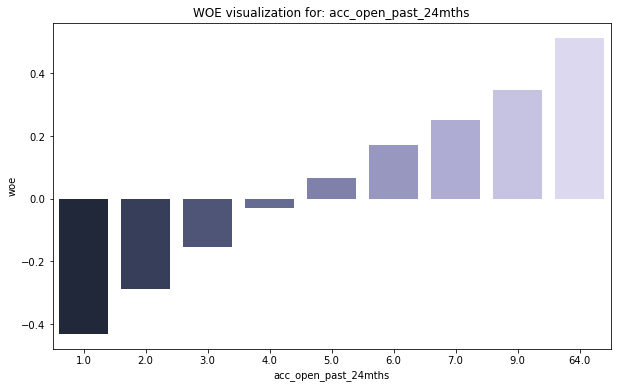

In [40]:
draw_woe(iv_dict, 'acc_open_past_24mths')

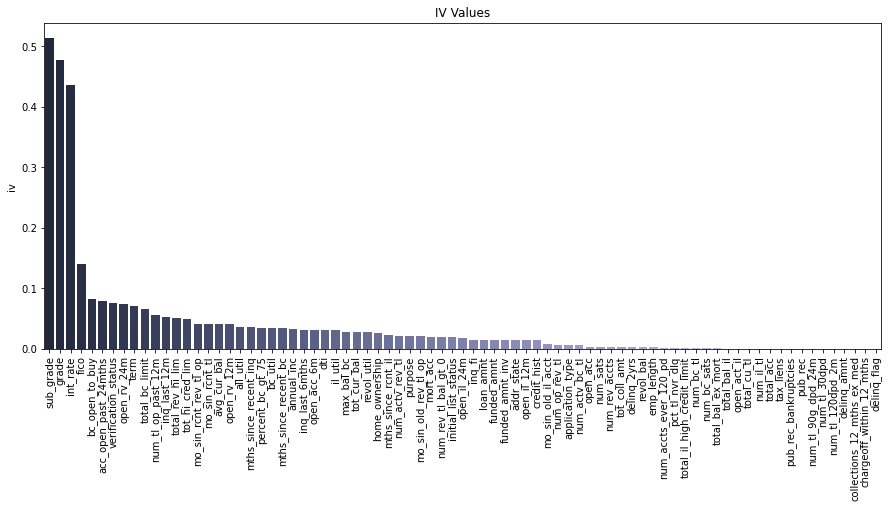

In [41]:
draw_iv(iv_results)

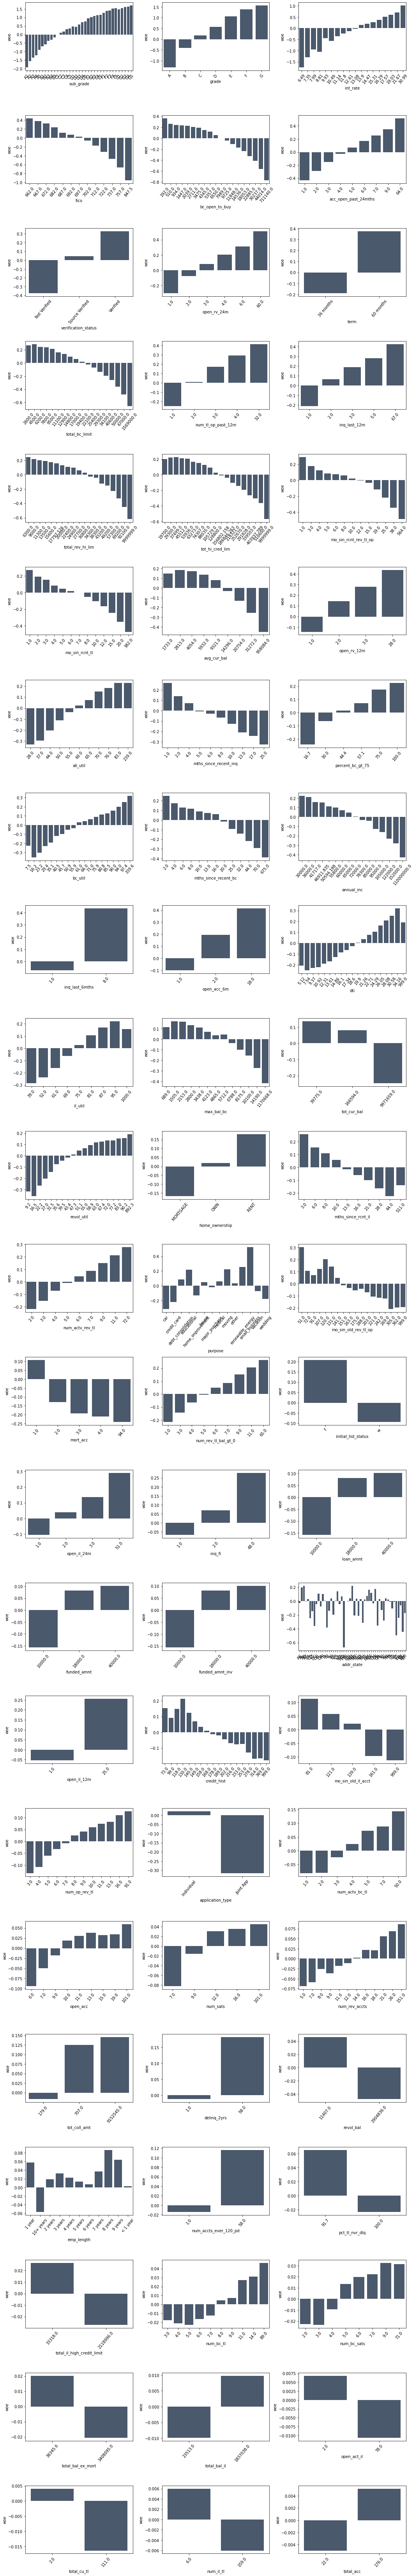

In [42]:
draw_woe_multiplots(iv_dict, feat_sorted)

In [43]:
# Correlations - table format

loan_data_dev_corr = loan_data_dev_woe[feat_shortlisted].corr()
pd.options.display.float_format = '{:.2f}'.format
loan_data_dev_corr

,int_rate,fico,bc_open_to_buy,acc_open_past_24mths,open_rv_24m,total_bc_limit,num_tl_op_past_12m,inq_last_12m,total_rev_hi_lim,tot_hi_cred_lim,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,avg_cur_bal,open_rv_12m,all_util,mths_since_recent_inq,percent_bc_gt_75,bc_util,mths_since_recent_bc,annual_inc,inq_last_6mths,open_acc_6m,dti,il_util,max_bal_bc,tot_cur_bal,revol_util,mths_since_rcnt_il,num_actv_rev_tl,mo_sin_old_rev_tl_op,mort_acc
int_rate,1.00,-0.41,-0.29,0.16,0.12,-0.24,0.17,0.16,-0.19,-0.12,-0.09,-0.11,-0.08,0.11,0.29,-0.14,0.27,0.28,-0.07,-0.05,0.18,0.13,0.12,0.14,-0.06,-0.08,0.26,-0.09,0.08,-0.13,-0.09
fico,-0.41,1.00,0.51,-0.10,-0.13,0.36,-0.09,-0.11,0.28,0.18,0.10,0.06,0.11,-0.11,-0.44,0.07,-0.43,-0.51,0.08,0.03,-0.09,-0.06,-0.02,-0.11,0.03,0.11,-0.49,-0.03,-0.20,0.13,0.09
bc_open_to_buy,-0.29,0.51,1.00,0.14,0.15,0.85,0.12,0.04,0.64,0.27,-0.08,-0.07,0.03,0.14,-0.47,-0.03,-0.44,-0.54,-0.13,0.11,0.02,0.12,-0.03,-0.04,0.17,0.17,-0.49,-0.04,0.13,0.17,0.12
acc_open_past_24mths,0.16,-0.10,0.14,1.00,0.85,0.08,0.77,0.41,0.12,0.13,-0.41,-0.45,-0.06,0.66,-0.04,-0.22,-0.17,-0.18,-0.34,0.04,0.29,0.56,0.07,0.23,-0.11,0.12,-0.22,-0.29,0.34,-0.06,0.08
open_rv_24m,0.12,-0.13,0.15,0.85,1.00,0.11,0.67,0.29,0.14,-0.01,-0.47,-0.36,-0.18,0.78,-0.17,-0.19,-0.17,-0.18,-0.39,-0.00,0.29,0.49,-0.00,0.08,-0.12,-0.04,-0.22,-0.05,0.43,-0.07,-0.04
total_bc_limit,-0.24,0.36,0.85,0.08,0.11,1.00,0.06,-0.00,0.77,0.41,-0.03,-0.02,0.12,0.08,-0.28,0.00,-0.21,-0.25,-0.10,0.18,-0.00,0.06,0.04,-0.10,0.56,0.31,-0.18,-0.02,0.31,0.26,0.20
num_tl_op_past_12m,0.17,-0.09,0.12,0.77,0.67,0.06,1.00,0.47,0.09,0.11,-0.41,-0.50,-0.04,0.84,-0.05,-0.30,-0.18,-0.19,-0.31,0.04,0.34,0.73,0.04,0.23,-0.11,0.10,-0.22,-0.26,0.26,-0.03,0.07
inq_last_12m,0.16,-0.11,0.04,0.41,0.29,-0.00,0.47,1.00,0.03,0.13,-0.17,-0.26,0.06,0.31,0.03,-0.53,-0.11,-0.12,-0.13,0.04,0.48,0.33,0.02,0.18,-0.08,0.14,-0.13,-0.20,0.09,-0.04,0.12
total_rev_hi_lim,-0.19,0.28,0.64,0.12,0.14,0.77,0.09,0.03,1.00,0.49,-0.06,-0.05,0.19,0.12,-0.23,-0.02,-0.15,-0.18,-0.06,0.19,0.02,0.09,0.06,-0.09,0.47,0.40,-0.14,-0.03,0.35,0.27,0.22
tot_hi_cred_lim,-0.12,0.18,0.27,0.13,-0.01,0.41,0.11,0.13,0.49,1.00,0.02,-0.09,0.78,-0.00,0.02,-0.06,-0.01,-0.01,0.03,0.27,0.03,0.10,0.04,-0.00,0.36,0.98,0.03,-0.12,0.14,0.22,0.55


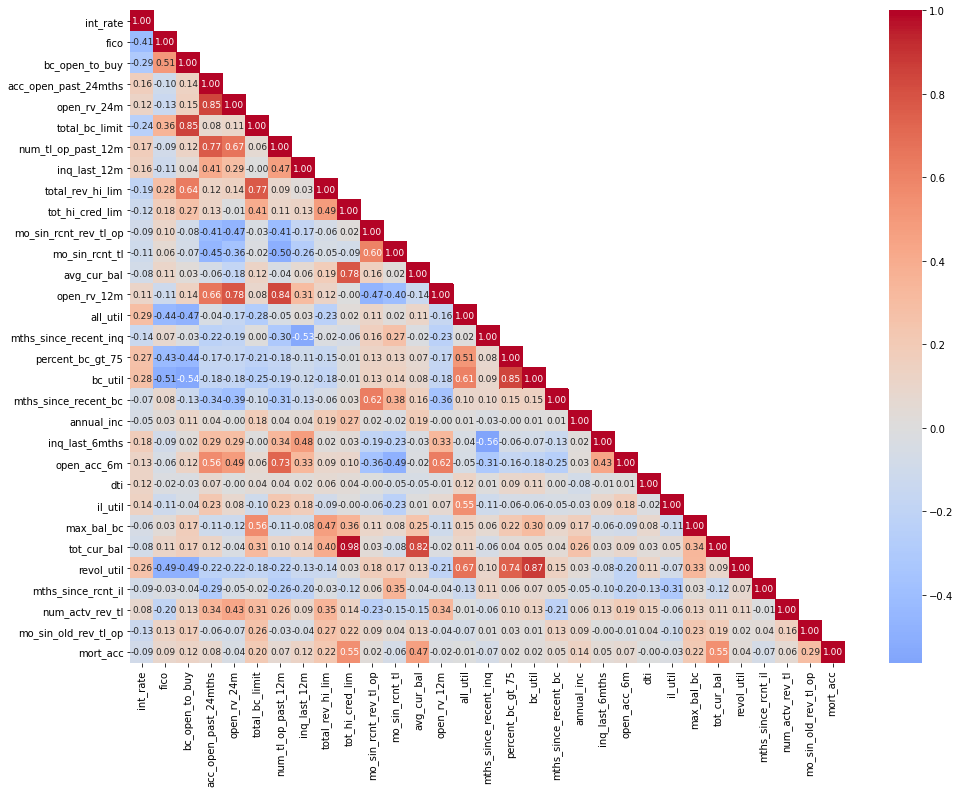

In [44]:
# Correlations - graph
plt.figure(figsize=(16,12))
sns.heatmap(loan_data_dev_corr, center=0, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'size':9},
            mask=np.triu(loan_data_dev_corr, 1))
plt.show()

In [45]:
# Identifying pairs with correlation > 0.75
# Takes Upper Triangle of Correlation Matrix and unstacks them in a vertical table
dev_corr_pairs = loan_data_dev_corr.where(np.triu(np.ones_like(loan_data_dev_corr, dtype=bool),k=1)).unstack().dropna().sort_values(ascending=False)
dev_corr_pairs[dev_corr_pairs.abs() >=0.75]

tot_cur_bal         tot_hi_cred_lim        0.98
revol_util          bc_util                0.87
total_bc_limit      bc_open_to_buy         0.85
bc_util             percent_bc_gt_75       0.85
open_rv_24m         acc_open_past_24mths   0.85
open_rv_12m         num_tl_op_past_12m     0.84
tot_cur_bal         avg_cur_bal            0.82
avg_cur_bal         tot_hi_cred_lim        0.78
open_rv_12m         open_rv_24m            0.78
total_rev_hi_lim    total_bc_limit         0.77
num_tl_op_past_12m  acc_open_past_24mths   0.77
dtype: float64

In [46]:
print(loan_data_dev[['tot_cur_bal','tot_hi_cred_lim']].isna().mean())
print(loan_data_dev[['revol_util','bc_util']].isna().mean())
print(loan_data_dev[['total_bc_limit','bc_open_to_buy']].isna().mean())
print(loan_data_dev[['bc_util','percent_bc_gt_75']].isna().mean())
print(loan_data_dev[['open_rv_24m','acc_open_past_24mths']].isna().mean())
print(loan_data_dev[['open_rv_12m','num_tl_op_past_12m']].isna().mean())
print(loan_data_dev[['tot_cur_bal','avg_cur_bal']].isna().mean())
print(loan_data_dev[['avg_cur_bal','tot_hi_cred_lim']].isna().mean())
print(loan_data_dev[['open_rv_12m','open_rv_24m']].isna().mean())
print(loan_data_dev[['total_rev_hi_lim','total_bc_limit']].isna().mean())
print(loan_data_dev[['num_tl_op_past_12m','acc_open_past_24mths']].isna().mean())

tot_cur_bal       0.03
tot_hi_cred_lim   0.03
dtype: float64
revol_util   0.00
bc_util      0.03
dtype: float64
total_bc_limit   0.02
bc_open_to_buy   0.03
dtype: float64
bc_util            0.03
percent_bc_gt_75   0.03
dtype: float64
open_rv_24m            0.33
acc_open_past_24mths   0.02
dtype: float64
open_rv_12m          0.33
num_tl_op_past_12m   0.03
dtype: float64
tot_cur_bal   0.03
avg_cur_bal   0.03
dtype: float64
avg_cur_bal       0.03
tot_hi_cred_lim   0.03
dtype: float64
open_rv_12m   0.33
open_rv_24m   0.33
dtype: float64
total_rev_hi_lim   0.03
total_bc_limit     0.02
dtype: float64
num_tl_op_past_12m     0.03
acc_open_past_24mths   0.02
dtype: float64


In [47]:
print(loan_data_dev[feat_shortlisted].isna().mean())
print(loan_data_dev[feat_shortlisted].isna().any().mean()) #0.75

sub_grade               0.00
grade                   0.00
int_rate                0.00
fico                    0.00
bc_open_to_buy          0.03
acc_open_past_24mths    0.02
verification_status     0.00
open_rv_24m             0.33
term                    0.00
total_bc_limit          0.02
num_tl_op_past_12m      0.03
inq_last_12m            0.33
total_rev_hi_lim        0.03
tot_hi_cred_lim         0.03
mo_sin_rcnt_rev_tl_op   0.03
mo_sin_rcnt_tl          0.03
avg_cur_bal             0.03
open_rv_12m             0.33
all_util                0.33
mths_since_recent_inq   0.13
percent_bc_gt_75        0.03
bc_util                 0.03
mths_since_recent_bc    0.03
annual_inc              0.00
inq_last_6mths          0.00
open_acc_6m             0.33
dti                     0.00
il_util                 0.42
max_bal_bc              0.33
tot_cur_bal             0.03
revol_util              0.00
home_ownership          0.00
mths_since_rcnt_il      0.35
num_actv_rev_tl         0.03
purpose       

In [48]:
feat_shortlisted_robust = [f for f in feat_shortlisted if f not in ['sub_grade','open_rv_24m','inq_last_12m','open_rv_12m',
                                                   'all_util','mths_since_recent_inq','open_acc_6m',
                                                   'il_util','max_bal_bc','mths_since_rcnt_il']]

# reason for droppin fields:
# 'sub-grade' - very similar to 'grade'
# 'open_rv_24m', 'open_rv_12m' - high correlation with more complete variables
# 'inq_last_12m', 'all_util', 'mths_since_recent_inq', 'open_acc_6m', 'il_util'
#               ,'max_bal_bc', 'mths_since_rcnt_il'  - low IV and high %age of missing values
print(feat_shortlisted_robust, len(feat_shortlisted_robust))

['grade', 'int_rate', 'fico', 'bc_open_to_buy', 'acc_open_past_24mths', 'verification_status', 'term', 'total_bc_limit', 'num_tl_op_past_12m', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'avg_cur_bal', 'percent_bc_gt_75', 'bc_util', 'mths_since_recent_bc', 'annual_inc', 'inq_last_6mths', 'dti', 'tot_cur_bal', 'revol_util', 'home_ownership', 'num_actv_rev_tl', 'purpose', 'mo_sin_old_rev_tl_op', 'mort_acc'] 27


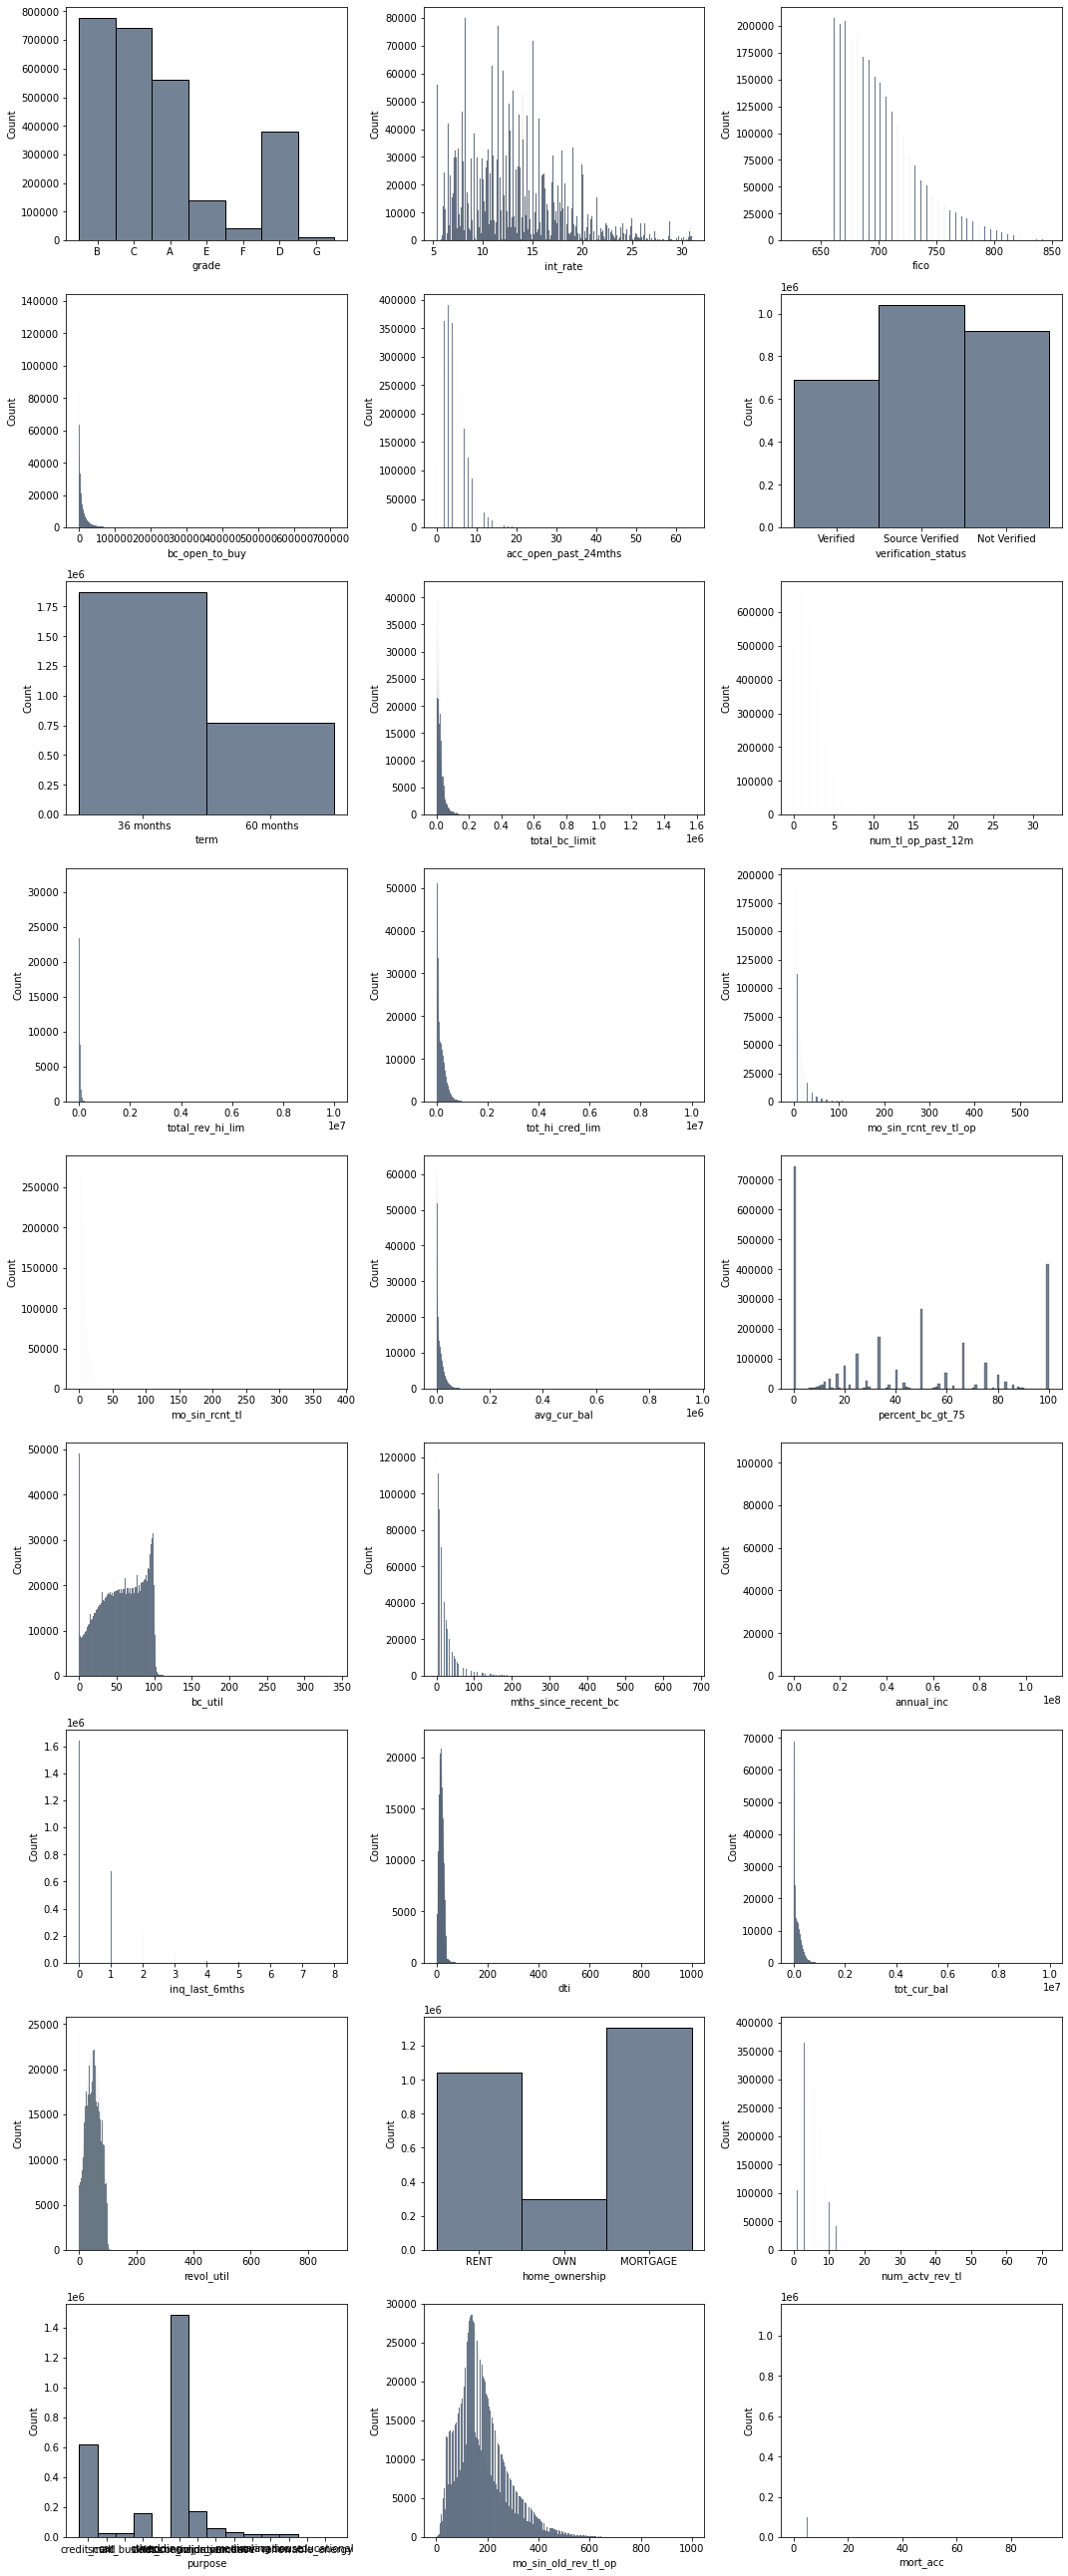

In [49]:
n = len(feat_shortlisted_robust)
nrows = int(np.ceil(n/3))
fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*4))
       
for i, feature in enumerate(feat_shortlisted_robust):
    sns.histplot(x=feature, data=loan_data_dev, color='#455872', ax=fig.axes[i])

plt.tight_layout()
plt.show()

### Notes:
* The EDA helped us identify the list of features which appear to carry meaningful information. This allows us to shorten the list of total features available in the data - which is important from both interpretability standpoint, but also from the point of handling features with missing value.

In [77]:
len(feat_shortlisted_robust), feat_shortlisted_robust

(27,
 ['grade',
  'int_rate',
  'fico',
  'bc_open_to_buy',
  'acc_open_past_24mths',
  'verification_status',
  'term',
  'total_bc_limit',
  'num_tl_op_past_12m',
  'total_rev_hi_lim',
  'tot_hi_cred_lim',
  'mo_sin_rcnt_rev_tl_op',
  'mo_sin_rcnt_tl',
  'avg_cur_bal',
  'percent_bc_gt_75',
  'bc_util',
  'mths_since_recent_bc',
  'annual_inc',
  'inq_last_6mths',
  'dti',
  'tot_cur_bal',
  'revol_util',
  'home_ownership',
  'num_actv_rev_tl',
  'purpose',
  'mo_sin_old_rev_tl_op',
  'mort_acc'])

In [69]:
# IGNORE
# Mutual Information - similar idea as WOE

from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

temp = loan_data_dev.drop(columns='issue_d')
temp.rename(columns={'credit_event':'label'}, inplace=True)

feats = [c for c in loan_data_dev_woe.columns if c != 'label' and is_numeric_dtype(loan_data_dev_woe[c])]
temp = temp[~temp.isna().any(axis=1)].sample(n=10000, replace=False)
temp.shape

mi = mutual_info_classif(temp[feats], temp['label'])

mi = pd.Series(mi)
mi.index = temp[feats].columns
mi.sort_values(ascending=False, inplace=True)

plt.title('Mutual information of features')
mi.plot.bar(figsize = (16,5))
plt.show()